## How NLP Pipelines Work
The 3 stages of an NLP pipeline are: Text Processing > Feature Extraction > Modeling.

- **Text Processing**: Take raw input text, clean it, normalize it, and convert it into a form that is suitable for feature extraction.
- **Feature Extraction**: Extract and produce feature representations that are appropriate for the type of NLP task you are trying to accomplish and the type of model you are planning to use.
- **Modeling**: Design a statistical or machine learning model, fit its parameters to training data, use an optimization procedure, and then use it to make predictions about unseen data.

This process isn't always linear and may require additional steps.

## Stage 1: Text Processing
The first chunk of this lesson will explore the steps involved in text processing, the first stage of the NLP pipeline.

## Why Do We Need to Process Text?
- Extracting plain text: Textual data can come from a wide variety of sources: the web, PDFs, word documents, speech recognition systems, book scans, etc. Your goal is to extract plain text that is free of any source specific markup or constructs that are not relevant to your task.
- Reducing complexity: Some features of our language like capitalization, punctuation, and common words such as a, of, and the, often help provide structure, but don't add much meaning. Sometimes it's best to remove them if that helps reduce the complexity of the procedures you want to apply later.

You'll prepare text data from different sources with the following text processing steps:

1. Cleaning to remove irrelevant items, such as HTML tags
2. Normalizing by converting to all lowercase and removing punctuation
3. Splitting text into words or tokens
4. Removing words that are too common, also known as stop words
5. Identifying different parts of speech and named entities
6. Converting words into their dictionary forms, using stemming and lemmatization

After performing these steps, your text will capture the essence of what was being conveyed in a form that is easier to work with.

## Cleaning
Let's walk through an example of cleaning text data from a popular source - the web. You'll be introduced to helpful tools in working with this data, including the requests library, regular expressions, and Beautiful Soup.

## Documentation for Python Libraries:
- [Requests](https://docs.python.org/3/library/urllib.request.html?highlight=request)
- [Regular Expressions](https://docs.python.org/3/library/re.html)
- [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

# Cleaning Quiz: Udacity's Course Catalog
It's your turn! Udacity's [course catalog page](https://www.udacity.com/courses/all) has changed since the last video was filmed. One notable change is the introduction of  _schools_.

In this activity, you're going to perform similar actions with BeautifulSoup to extract the following information from each course listing on the page:
1. The course name - e.g. "Data Analyst"
2. The school the course belongs to - e.g. "School of Data Science"

**Note: All solution notebooks can be found by clicking on the Jupyter icon on the top left of this workspace.**

### Step 1: Get text from Udacity's course catalog web page
You can use the `requests` library to do this.

Outputting all the javascript, CSS, and text may overload the space available to load this notebook, so we omit a print statement here.

In [9]:
# import statements
import requests
from bs4 import BeautifulSoup

In [11]:
# fetch web page
r = requests.get('https://www.udacity.com/courses/all')

### Step 2: Use BeautifulSoup to remove HTML tags
Use `"lxml"` rather than `"html5lib"`.

Again, outputting all the results may overload the space available to load this notebook, so we omit a print statement here.

In [14]:
soup = BeautifulSoup(r.text,'lxml')

### Step 3: Find all course summaries
Use the BeautifulSoup's `find_all` method to select based on tag type and class name. Just ike in the video, you can right click on the item, and click "Inspect" to view its html on a web page.

In [16]:
# Find all course summaries
summaries = soup.find_all('div',class_ = 'card-content')
print('Number of Courses:', len(summaries))

Number of Courses: 236


### Step 4: Inspect the first summary to find selectors for the course name and school
Tip: `.prettify()` is a super helpful method BeautifulSoup provides to output html in a nicely indented form! Make sure to use `print()` to ensure whitespace is displayed properly.

In [17]:
# print the first summary in summaries
print(summaries[0].prettify())

<div _ngcontent-sc216="" class="card-content">
 <!-- -->
 <span _ngcontent-sc216="" class="tag tag--new card ng-star-inserted">
  New
 </span>
 <!-- -->
 <div _ngcontent-sc216="" class="category-wrapper">
  <span _ngcontent-sc216="" class="mobile-icon">
  </span>
  <!-- -->
  <h4 _ngcontent-sc216="" class="category ng-star-inserted">
   School of Business
  </h4>
 </div>
 <h3 _ngcontent-sc216="" class="card-heading">
  <a _ngcontent-sc216="" class="capitalize" href="/course/ai-for-business-leaders--nd054">
   AI for Business Leaders
  </a>
 </h3>
 <div _ngcontent-sc216="" class="right-sub">
  <!-- -->
  <div _ngcontent-sc216="" class="skills ng-star-inserted">
   <h4 _ngcontent-sc216="">
    Skills Covered
   </h4>
   <span _ngcontent-sc216="" class="truncate-content">
    <!-- -->
    <span _ngcontent-sc216="" class="ng-star-inserted">
     Artificial Intelligence,
    </span>
    <span _ngcontent-sc216="" class="ng-star-inserted">
     Machine Learning,
    </span>
    <span _ngconte

Look for selectors that contain the courses title and school name text you want to extract. Then, use the `select_one` method on the summary object to pull out the html with those selectors. Afterwards, don't forget to do some extra cleaning to isolate the names (get rid of unnecessary html), as you saw in the last video.

In [18]:
# Extract course title
summaries[0].select_one('h3 a').get_text().strip()


'AI for Business Leaders'

In [19]:
# Extract school
summaries[0].select('h4')[0].get_text().strip()


'School of Business'

### Step 5: Collect names and schools of ALL course listings
Reuse your code from the previous step, but now in a loop to extract the name and school from every course summary in `summaries`!

In [20]:
courses = []
for summary in summaries:
    title = summary.select_one('h3 a').get_text().strip()
    school = summary.select('h4')[0].get_text().strip()
    
    # append name and school of each summary to courses list
    courses.append((title,school))

In [22]:
# display results
print(len(courses), "course summaries found. Sample:")
courses[:40]

236 course summaries found. Sample:


[('AI for Business Leaders', 'School of Business'),
 ('Intro to Machine Learning with TensorFlow',
  'School of Artificial Intelligence'),
 ('UX Designer', 'School of Business'),
 ('Data Streaming', 'School of Data Science'),
 ('Front End Web Developer', 'School of Programming'),
 ('Full Stack Web Developer', 'School of Programming'),
 ('Java Developer', 'School of Programming'),
 ('AI Product Manager', 'School of Artificial Intelligence'),
 ('Sensor Fusion Engineer', 'School of Autonomous Systems'),
 ('Data Visualization', 'School of Data Science'),
 ('Cloud Developer', 'School of Cloud Computing'),
 ('Cloud DevOps Engineer', 'School of Cloud Computing'),
 ('Intro to Machine Learning with PyTorch',
  'School of Artificial Intelligence'),
 ('C++', 'School of Autonomous Systems'),
 ('Data Structures and Algorithms', 'School of Programming'),
 ('Programming for Data Science with R', 'School of Data Science'),
 ('Data Engineer', 'School of Data Science'),
 ('Marketing Analytics', 'School 

# Normalization Quiz
Use what you've learned in the last video to normalize case in the following text and remove punctuation!

**Note: All solution notebooks can be found by clicking on the Jupyter icon on the top left of this workspace.**

In [27]:
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


### Case Normalization

In [28]:
# Convert to lowercase
text = text.lower()
print(text)

the first time you see the second renaissance it may look boring. look at it at least twice and definitely watch part 2. it will change your view of the matrix. are the human people the ones who started the war ? is ai a bad thing ?


### Punctuation Removal
Use the `re` library to remove punctuation with a regular expression (regex). Feel free to refer back to the video or Google to get your regular expression. You can learn more about regex [here](https://docs.python.org/3/howto/regex.html).

In [29]:
# Remove punctuation characters
import re

text = re.sub(r'[^A-Za-z0-9]', ' ', text) # replace punchuation with space
print(text)

the first time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


## Tokenization
Reference:

`nltk.tokenize` package: http://www.nltk.org/api/nltk.tokenize.html

### Note on NLTK data download
Run the cell below to download the necessary nltk data packages. Note, because we are working in classroom workspaces, we will be downloading specific packages in each notebook throughout the lesson. However, you can download all packages by entering `nltk.download()` on your computer. Keep in mind this does take up a bit more space. You can learn more about nltk data installation [here](https://www.nltk.org/data.html).

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/xuhao3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Tokenization
Try out the tokenization methods in nltk to split the following text into words and then sentences.

**Note: All solution notebooks can be found by clicking on the Jupyter icon on the top left of this workspace.**

In [35]:
# import statements
from nltk import word_tokenize
from nltk import sent_tokenize

In [31]:
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [34]:
# Split text into words using NLTK
words = word_tokenize(text)
words

['Dr.',
 'Smith',
 'graduated',
 'from',
 'the',
 'University',
 'of',
 'Washington',
 '.',
 'He',
 'later',
 'started',
 'an',
 'analytics',
 'firm',
 'called',
 'Lux',
 ',',
 'which',
 'catered',
 'to',
 'enterprise',
 'customers',
 '.']

In [36]:
# Split text into sentences
sentences = sent_tokenize(text)
sentences

['Dr. Smith graduated from the University of Washington.',
 'He later started an analytics firm called Lux, which catered to enterprise customers.']

# Stop Words
Combine the steps you learned so far to normalize, tokenize, and remove stop words from the text below.

**Note: All solution notebooks can be found by clicking on the Jupyter icon on the top left of this workspace.**

In [39]:
# import statements
from nltk.corpus import stopwords

In [40]:
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [42]:
# Normalize text
text = re.sub(r'[^a-zA-Z0-9]',' ',text.lower() )

In [43]:
# Tokenize text
words = word_tokenize(text)
print(words)


['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [47]:
# Remove stop words
words = [i for i in words if i not in stopwords.words('english')]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


In [38]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Parts of Speech (POS) Tagging
**Note: All solution notebooks can be found by clicking on the Jupyter icon on the top left of this workspace.**

**Note**: Part-of-speech tagging using a predefined grammar like this is a simple, but limited, solution. It can be very tedious and error-prone for a large corpus of text, since you have to account for all possible sentence structures and tags!

There are other more advanced forms of POS tagging that can learn sentence structures and tags from given data, including Hidden Markov Models (HMMs) and Recurrent Neural Networks (RNNs).

In [51]:
# import statements
from nltk import word_tokenize
from nltk import pos_tag


In [52]:
text = "I always lie down to tell a lie."

In [53]:
# tokenize text
sentence = word_tokenize(text)

# tag each word with part of speech
pos_tag(sentence)

[('I', 'PRP'),
 ('always', 'RB'),
 ('lie', 'VBP'),
 ('down', 'RP'),
 ('to', 'TO'),
 ('tell', 'VB'),
 ('a', 'DT'),
 ('lie', 'NN'),
 ('.', '.')]

Note

[NLTK](https://www.nltk.org/book/ch05.html) provides documentation for each tag, which can be queried using the tag, e.g. nltk.help.upenn_tagset('RB'), or a regular expression, e.g. nltk.help.upenn_tagset('NN.*'). Some corpora have README files with tagset documentation, see nltk.corpus.???.readme(), substituting in the name of the corpus.

In [54]:
nltk.help.upenn_tagset('RB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


In [55]:
nltk.help.upenn_tagset('NN.*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


## Named Entity Recognition (NER)

In [59]:
from nltk import pos_tag, ne_chunk

In [60]:
text = "Antonio joined Udacity Inc. in California."

In [61]:
# tokenize, pos tag, then recognize named entities in text
tree = ne_chunk(pos_tag(word_tokenize(text)))
print(tree)

(S
  (PERSON Antonio/NNP)
  joined/VBD
  (ORGANIZATION Udacity/NNP Inc./NNP)
  in/IN
  (GPE California/NNP)
  ./.)


### Sentence Parsing

In [48]:
# Define a custom grammar
my_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
parser = nltk.ChartParser(my_grammar)

In [57]:
# Parse a sentence
sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [58]:
# visualize parse trees
for tree in parser.parse(sentence):
    tree.draw()

# Stemming and Lemmatizing
Let's return to this example from the stop words removal quiz.

stemming sometimes results in stems that are not complete words in English.

Lemmatization is similar to stemming with one difference, the final form is also a meaningful word.

Stemming does not need a dictionary like lemmatization does. So it maybe a less memory intensive option for you to consider.

In [ ]:
from nltk.corpus import stopwords

In [65]:
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize text
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize text
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [66]:
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


### Stemming

In [67]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


### Lemmatization

In [68]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


In [69]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']


#### Workflow:

start with a plain text sentence, 
1. normalize it by converting to lowercase and removing punctuation

```python
text = text.lower()
text = re.sub(r'[^a-zA-Z0-9]',' ', text)
```
2. split it up into words using a tokenizer

```python
from nltk import word_tokenize
from nltk import sent_tokenize
words = word_tokenize(text)
sentence = sent_tokenize(text)
```

3. remove stop words to reduce the vocablary have to deal with

```python
from nltk.corpus import stopwords
words = [i for i in words if i not in stopwords.words('english')]
```

4. choose to apply a combination of stemming and lemmatization to reduce words to the root or stem form, it is common to apply both, lemmatization first, and then stemming.

```python
from nltk.stem.wordnet import WordNetLemmatizer
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]

from nltk.stem.porter import PorterStemmer
stemmed = [PorterStemmer().stem(w) for w in words]
```

5. we can also do Parts of Speech (POS) Tagging and Named Entity Recognition (NER)

```python
from nltk import pos_tag
pos_tag(sentence)

from nltk import pos_tag, ne_chunk
tree = ne_chunk(pos_tag(word_tokenize(text)))
```

This procedure coverts a natural language sentence into a sequence of normalized tokens which you can use for further analysis.

### Feature Extraction
WordNet visualization tool: http://mateogianolio.com/wordnet-visualization/

### Bag of words
The bag of words model treats each documnet as an un-ordered collection or bag of words
For instance, if you want to compare essays summitted by students to check for plagiarism, each essay would be a document. If you want to look at tweets, then each tweet would be a document.

A more useful approach is to turn each document into a vector of numbers
use every unique word in all the document as columns name, and every document as a row. each element is the frequency the column word show times in each document.
This formed a Document-Term Matrix.

what can we do next?

1. compare two documents, we can use the dot product of the two row vectors, which is the sum of the products of corresponding elements. Greater the dot product, the similar the tow documnets.

2. another way is to use $$ \cos(\theta) = \frac{a\bullet b}{\| a \| \bullet \| b \|} $$

```text
1、欧几里得范数指得就是通常意义上的距离范数。例如在欧式空间里，它表示两点间的距离(向量x的模长)。
2、||x||表示向量的长度，计算方法依然是向量各个元素模的平方之和再开方。
```

so the value is between 1 and -1 , 1 is very similer, -1 is dissimiler

### TF-IDF
one drawback of bag of words is it treat every word as equal
we can count the document each words occurs, and add a row 'document frequency'
then divide the thrm frequencies by the document frequency of that term

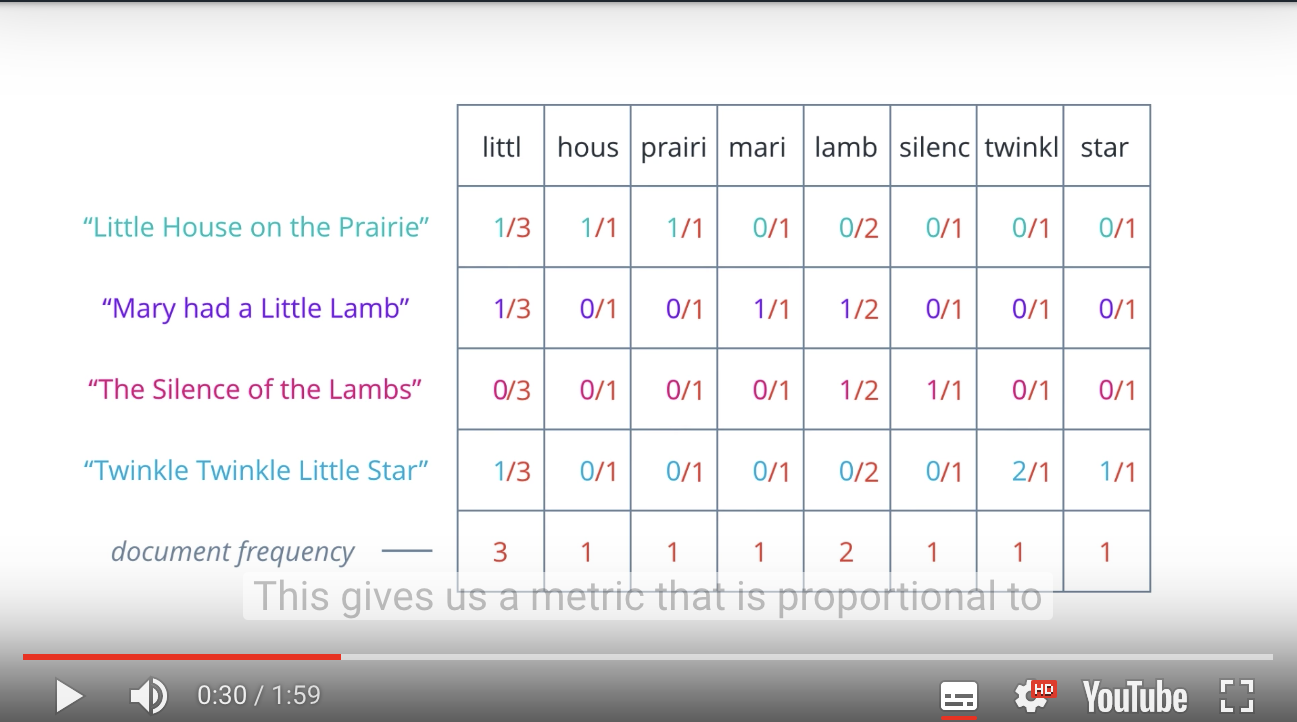

It can hight light the words that are more unique to a document,

TF-IDF
$$ tfidf(t,d,D) = tf(t.d)\bullet id(t,D) $$
tf(t,d) is term frequency = $ count(t,d) \div |d| $

idf(t,D) is inverse document frequency = $ \log (|D| \div |\{d \in D : t \in d\}|) $

count(t,d) is the raw count of a term T in a document D

|d| is the total number of terms in document D

|D| is the total number of documents in the collection D,

$ \{d \in D : t \in d\} $ is the number of documents where T is present


# Bag of Words and TF-IDF
Below, we'll look at three useful methods of vectorizing text.
- `CountVectorizer` - Bag of Words
- `TfidfTransformer` - TF-IDF values
- `TfidfVectorizer` - Bag of Words AND TF-IDF values

Let's first use an example from earlier and apply the text processing steps we saw in this lesson.

In [71]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [72]:
corpus = ["The first time you see The Second Renaissance it may look boring.",
        "Look at it at least twice and definitely watch part 2.",
        "It will change your view of the matrix.",
        "Are the human people the ones who started the war?",
        "Is AI a bad thing ?"]

In [73]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()


Use the skills you learned so far to create a function `tokenize` that takes in a string of text and applies the following:
- case normalization (convert to all lowercase)
- punctuation removal
- tokenization, lemmatization, and stop word removal using `nltk`

Feel free to refer back to previous sections to complete these steps!

In [74]:
def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize andremove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens

# `CountVectorizer` (Bag of Words)

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

# initialize count vectorizer object
vect = CountVectorizer(tokenizer=tokenize)

In [76]:
# get counts of each token (word) in text data
X = vect.fit_transform(corpus)

In [77]:
# convert sparse matrix to numpy array to view
X.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0]])

In [87]:
vect.get_feature_names()

['2',
 'ai',
 'bad',
 'boring',
 'change',
 'definitely',
 'first',
 'human',
 'least',
 'look',
 'matrix',
 'may',
 'one',
 'part',
 'people',
 'renaissance',
 'second',
 'see',
 'started',
 'thing',
 'time',
 'twice',
 'view',
 'war',
 'watch']

In [78]:
# view token vocabulary and counts
vect.vocabulary_

{'first': 6,
 'time': 20,
 'see': 17,
 'second': 16,
 'renaissance': 15,
 'may': 11,
 'look': 9,
 'boring': 3,
 'least': 8,
 'twice': 21,
 'definitely': 5,
 'watch': 24,
 'part': 13,
 '2': 0,
 'change': 4,
 'view': 22,
 'matrix': 10,
 'human': 7,
 'people': 14,
 'one': 12,
 'started': 18,
 'war': 23,
 'ai': 1,
 'bad': 2,
 'thing': 19}

# `TfidfTransformer`

In [79]:
from sklearn.feature_extraction.text import TfidfTransformer

# initialize tf-idf transformer object
transformer = TfidfTransformer(smooth_idf=False)

In [88]:
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [80]:
# use counts from count vectorizer results to compute tf-idf values
tfidf = transformer.fit_transform(X)

In [85]:
tfidf

<5x25 sparse matrix of type '<class 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [81]:
# convert sparse matrix to numpy array to view
tfidf.toarray()

array([[0.        , 0.        , 0.        , 0.36419547, 0.        ,
        0.        , 0.36419547, 0.        , 0.        , 0.26745392,
        0.        , 0.36419547, 0.        , 0.        , 0.        ,
        0.36419547, 0.36419547, 0.36419547, 0.        , 0.        ,
        0.36419547, 0.        , 0.        , 0.        , 0.        ],
       [0.39105193, 0.        , 0.        , 0.        , 0.        ,
        0.39105193, 0.        , 0.        , 0.39105193, 0.28717648,
        0.        , 0.        , 0.        , 0.39105193, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.39105193, 0.        , 0.        , 0.39105193],
       [0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.57735027, 0.

# `TfidfVectorizer`
`TfidfVectorizer` = `CountVectorizer` + `TfidfTransformer`

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize tf-idf vectorizer object
vectorizer = TfidfVectorizer()

In [83]:
# compute bag of word counts and tf-idf values
X = vectorizer.fit_transform(corpus)

In [84]:
# convert sparse matrix to numpy array to view
X.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.30298183, 0.        , 0.        , 0.30298183, 0.        ,
        0.        , 0.20291046, 0.        , 0.24444384, 0.        ,
        0.30298183, 0.        , 0.        , 0.        , 0.        ,
        0.30298183, 0.30298183, 0.30298183, 0.        , 0.40582093,
        0.        , 0.30298183, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.30298183, 0.        ],
       [0.        , 0.30015782, 0.        , 0.60031564, 0.        ,
        0.        , 0.        , 0.30015782, 0.        , 0.        ,
        0.        , 0.20101919, 0.30015782, 0.24216544, 0.        ,
        0.        , 0.        , 0.        , 0.30015782, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.30015782, 0.        , 0.        ,
        0.30015782, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.

## Stage 3: Modeling
The final stage of the NLP pipeline is modeling, which includes designing a statistical or machine learning model, fitting its parameters to training data, using an optimization procedure, and then using it to make predictions about unseen data.

The nice thing about working with numerical features is that it allows you to choose from all machine learning models or even a combination of them.

Once you have a working model, you can deploy it as a web app, mobile app, or integrate it with other products and services. The possibilities are endless!

In [ ]:
Word2Vec transform word to vectors